# Worksheet 16

Name:  Michelle Sun
UID:  U14824452

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [1]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    return np.dot(alpha_i * Y, np.dot(X, x)) + b

def update_parameters(alpha_i, b, x, y, learning_rate, error):
    if error:
        alpha_i += learning_rate
        b += learning_rate * y
    else:
        alpha_i *= retracting_rate
        b *= expanding_rate
    return alpha_i, b

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    alpha_i, b = update_parameters(alpha_i, b, x, y, learning_rate, error)

        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [3]:
# Define the polynomial kernel function
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.6, random_state=0)
Y = np.array([-1 if label == 0 else 1 for label in labels])

alpha_i = np.zeros((len(X),))
b = 0

def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

def predict_many(alpha_i, b, Z, kernel_params):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i], kernel_params))
    return np.array(res)

def snap(x, alpha_i, b, error, kernel_params):
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r', fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y', fill=False))
   
    Z = predict_many(alpha_i, b, meshData, kernel_params)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def predict(alpha_i, b, x, kernel_params):
    # Modify the prediction function to use the specified kernel
    return np.dot(alpha_i * Y, np.array([polynomial(x_i, x, *kernel_params) for x_i in X])) + b

kernel_params = (1, 3)  # You can adjust these parameters
images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    alpha_i, b = update_parameters(alpha_i, b, x, y, learning_rate, error)
        
    images.append(snap(x, alpha_i, b, error, kernel_params))

images[0].save(
    'svm_polynomial.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

If the polynomial overfits, tuning the parameter down, which would be less of a curve, should help.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

If the RBF kernel function underfits when increase the parameter sigma, which makes the boundary more flexible.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

Best Parameters: {'C': 2, 'coef0': 0.0, 'degree': 1, 'gamma': 200, 'kernel': 'rbf'}
Test Accuracy: 0.6923076923076923


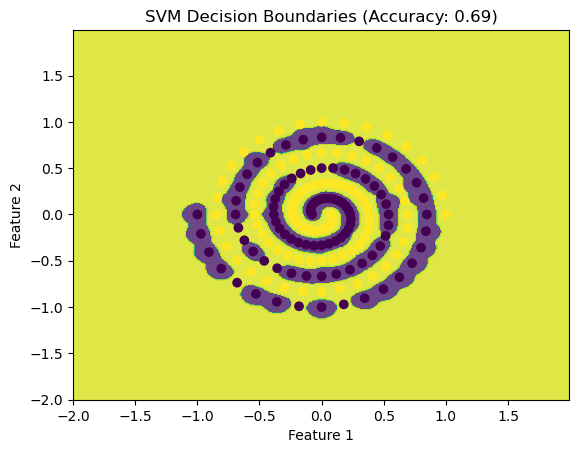

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# parameter grid for grid search
param_grid = {
    'C': [1, 2, 3, 4, 5],           # Regularization parameter
    'gamma': [50, 100, 200, 250],       # Kernel coefficient for RBF
    'kernel': ['rbf'],                            # Kernel type
    'degree': [1, 2, 3],                           # Degree of the polynomial kernel (if using polynomial kernel)
    'coef0': [0.0, 0.1, 0.5, 1.0, 2.0],                      # Independent term in the kernel function
}


svm_model = SVC(kernel='rbf')

grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


""" param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],      
    'kernel': ['poly'],                    
    'degree': [2, 3, 4],                        
    'coef0': [0.0, 1.0, 2.0],                      
}

svm_model_poly = SVC()

# Perform grid search with cross-validation for Polynomial kernel
grid_search_poly = GridSearchCV(svm_model_poly, param_grid, cv=5)
grid_search_poly.fit(x_train, y_train)

# Print the best parameters
best_params_poly = grid_search_poly.best_params_
print("Best Parameters for Polynomial Kernel:", best_params_poly)

# Use the best model to predict on the test set
best_model = grid_search_poly.best_estimator_
y_pred_poly = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_poly)
print("Test Accuracy for Polynomial Kernel:", accuracy) """

h = .01
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title(f"SVM Decision Boundaries (Accuracy: {accuracy:.2f})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()